<a href="https://colab.research.google.com/github/wagnerdsc/analise_de_cartoes_de_credito/blob/main/Analise_de_Cartoes_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as principais bibliotecas e o dataset
import pandas as pd 
uri = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
dataframe = pd.read_csv(uri)
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#Removendo colunas
dataframe = dataframe.drop(columns=["CUST_ID", "TENURE"])

#Outra possibilidade
#dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)

In [ ]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
# Removendo dados nulos
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
# Substituindo valores faltantes pela mediana
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
# Normalização dos dados
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
#Algortimo não deterministico KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [ ]:
from sklearn import metrics 
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3643891019677421


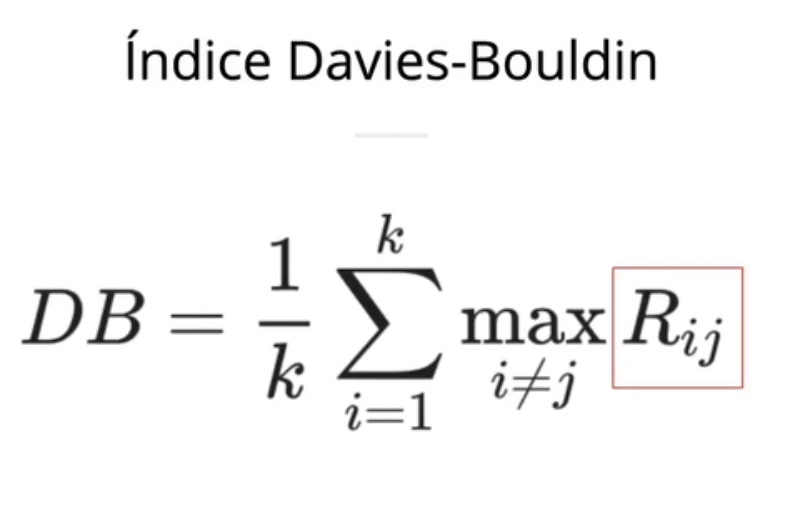

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075928412708598

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.776631279097


In [ ]:
def clustering_algotithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)  
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algotithm(3,values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.4405199082735


In [ ]:
s2, dbs2, calinski2 = clustering_algotithm(5,values)
print(s2, dbs2, calinski2)

0.36450417328686124 1.0757705558830923 3431.8008235317793


In [ ]:
s3, dbs3, calinski3 = clustering_algotithm(10,values)
print(s3, dbs3, calinski3)

0.3515315951099124 1.1149518884046803 3019.136702649808


In [ ]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algotithm(5,random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039601183165113706 3.4819819821706615 303.8632947517327
0.36450417328686124 1.0757705558830923 3431.8008235317793


In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algotithm(5, set1)
s2, dbs2, calinski2 = clustering_algotithm(5, set2)
s3, dbs3, calinski3 = clustering_algotithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3692455604046628 1.055043972045924 1203.9722444846886
0.35416642754504835 1.1382306445993162 1194.9519865048878
0.36704188760608253 1.0984932613776763 1167.5309516803998


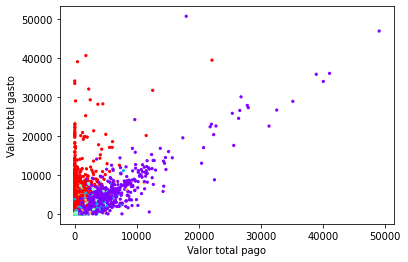

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

In [ ]:
import seaborn as sns
dataframe['cluster'] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Error in callback <function flush_figures at 0x7f2eb6b4f0e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.59970277e-01 2.45420653e-04 4.37832758e-01 2.56342445e-01
  1.81661269e-01 2.57701902e-02 2.04632150e-04 8.87805917e-05
  1.51042337e-04 9.36227386e-06 1.69268877e-04 6.17437812e-03
  6.04822057e-01 4.02343053e-01 8.52508929e-02 7.25704005e-05]
 [5.04105094e-01 2.72167105e-04 6.15438810e-02 3.61370321e-02
  2.54285784e-02 2.53309289e-01 6.71965307e-05 2.56845751e-05
  4.49251577e-05 5.74947541e-05 1.15819794e-03 1.32736701e-03
  7.19252474e-01 1.66035311e-01 1.79161221e-01 5.52720859e-07]
 [6.91174009e-02 2.30606539e-04 1.21226581e-01 4.79772863e-02
  7.33497068e-02 2.41947578e-02 1.72617514e-04 3.36929404e-05
  1.40042773e-04 7.92242513e-06 1.23760508e-04 2.85805113e-03
  9.43803334e-01 1.53494462e-01 5.68407863e-02 7.58440293e-05]
 [3.33483624e-01 2.68969713e-04 1.59146477e-01 3.61931219e-02
  1.23336164e-01 5.80731211e-02 1.67333390e-04 2.64804728e-05
  1.47698430e-04 1.92281888e-05 4.25862512e-04 3.87053484e-03
  3.77114118e-01 2.52735252e-01 6.78741705e-01 4.21940580e-06]
 [2.

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000




*   BALANCE 0.0224
*   PURCHASES 0.0196
*   CASH_ADVANCE 0.0226
*   CREDIT_LIMIT 0.0360
*   PAYMENTS 0.0280

In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()

description = description.mean()

description['n_clients'] = n_clients

print(description)

             BALANCE    PURCHASES  ...     PAYMENTS  n_clients
cluster                            ...                        
0        1148.959844  3267.501781  ...  3035.900502       1544
1        3034.218419   381.722765  ...   966.280942       2647
2         444.146902   628.970831  ...   814.094493       3275
3        1987.146873   858.326286  ...  1338.974045        412
4        1794.024195   475.494823  ...  4709.556601       1072

[5 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
